In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
L95 = pd.read_csv('L95_Solution_Camp_2_10_100_No_control.csv')
median = pd.read_csv('median_Solution_Camp_2_10_100_No_control.csv')
middle = pd.read_csv('middle_R0_Solution_Camp_2_10_100_No_control.csv')
U95 = pd.read_csv('U95_Solution_Camp_2_10_100_No_control.csv')

L95 = L95.drop('Unnamed: 0', axis = 1)
median = median.drop('Unnamed: 0', axis = 1)
middle = middle.drop('Unnamed: 0', axis = 1)
U95 = U95.drop('Unnamed: 0', axis = 1)

In [6]:
middle.head()

,Susceptible: 0-20,Exposed: 0-20,Infected (symptomatic): 0-20,Asymptomatically Infected: 0-20,Recovered: 0-20,Hospitalised: 0-20,Critical: 0-20,Deaths: 0-20,Susceptible: 20-40,Exposed: 20-40,...,Susceptible,Exposed,Infected (symptomatic),Asymptomatically Infected,Recovered,Hospitalised,Critical,Deaths,New Exposure,New Deaths
0,0.399999,0.000000,1.000000e-06,1.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.399999,0.000000,...,0.999997,0.000000,0.000003,0.000003,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1,0.399998,0.000001,9.006020e-07,9.006020e-07,3.736420e-07,3.511826e-10,9.688126e-13,1.717739e-13,0.399998,0.000001,...,0.999994,0.000003,0.000002,0.000002,9.132091e-07,2.142214e-08,3.013007e-10,5.342167e-11,0.000004,5.342167e-11
2,0.399996,0.000002,9.473695e-07,9.473695e-07,7.390805e-07,6.539132e-10,3.128608e-12,1.162667e-12,0.399996,0.000002,...,0.999990,0.000006,0.000002,0.000002,1.808123e-06,3.988871e-08,9.729971e-10,3.615894e-10,0.000004,3.081677e-10
3,0.399994,0.000003,1.093054e-06,1.093054e-06,1.143987e-06,9.585613e-10,5.916730e-12,3.402925e-12,0.399994,0.000003,...,0.999986,0.000008,0.000003,0.000003,2.801015e-06,5.847224e-08,1.840103e-09,1.058310e-09,0.000004,6.967203e-10
4,0.399993,0.000004,1.319628e-06,1.319628e-06,1.623582e-06,1.297973e-09,9.187397e-12,7.158795e-12,0.399993,0.000004,...,0.999981,0.000011,0.000003,0.000003,3.977982e-06,7.917635e-08,2.857280e-09,2.226385e-09,0.000005,1.168076e-09


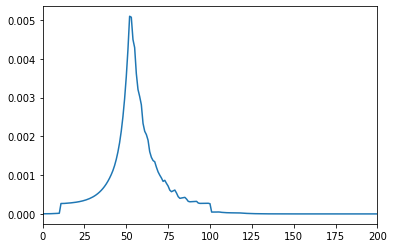

In [7]:
median['New Exposure'].plot(kind = 'line')

In [8]:
middle.columns

Index(['Susceptible: 0-20', 'Exposed: 0-20', 'Infected (symptomatic): 0-20',
       'Asymptomatically Infected: 0-20', 'Recovered: 0-20',
       'Hospitalised: 0-20', 'Critical: 0-20', 'Deaths: 0-20',
       'Susceptible: 20-40', 'Exposed: 20-40', 'Infected (symptomatic): 20-40',
       'Asymptomatically Infected: 20-40', 'Recovered: 20-40',
       'Hospitalised: 20-40', 'Critical: 20-40', 'Deaths: 20-40',
       'Susceptible: 40+', 'Exposed: 40+', 'Infected (symptomatic): 40+',
       'Asymptomatically Infected: 40+', 'Recovered: 40+', 'Hospitalised: 40+',
       'Critical: 40+', 'Deaths: 40+', 'Time', 'Susceptible', 'Exposed',
       'Infected (symptomatic)', 'Asymptomatically Infected', 'Recovered',
       'Hospitalised', 'Critical', 'Deaths', 'New Exposure', 'New Deaths'],
      dtype='object')

In [9]:
multiple_deaths = pd.melt(middle, id_vars = ['Time'], value_vars = ['Deaths: 0-20', 
                                                                    'Deaths: 20-40', 
                                                                    'Deaths: 40+',
                                                                    ])

In [10]:
multiple_hospitalised = pd.melt(middle, id_vars = ['Time'], value_vars = [
                                                                    'Hospitalised: 0-20',
                                                                    'Hospitalised: 20-40',
                                                                    'Hospitalised: 40+',
                                                                         ])

In [11]:
multiple_infected = pd.melt(middle, id_vars = ['Time'], value_vars = ['Exposed: 0-20', 
                                                                    'Exposed: 20-40', 
                                                                    'Exposed: 40+',
                                                                    ])

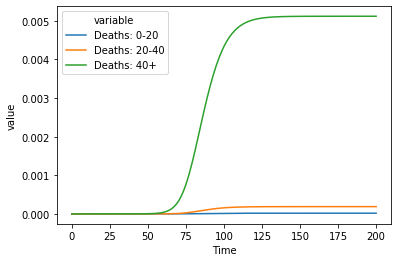

In [12]:
sns.lineplot(x = 'Time', y = 'value', data = multiple_deaths, hue = 'variable')

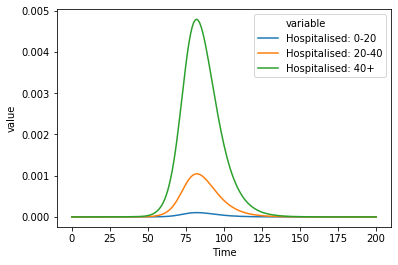

In [13]:
sns.lineplot(x = 'Time', y = 'value', data = multiple_hospitalised, hue = 'variable')

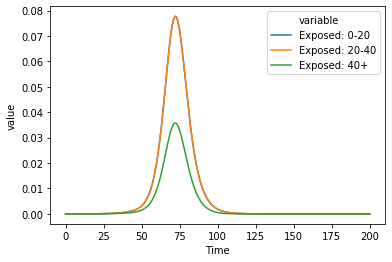

In [14]:
sns.lineplot(x = 'Time', y = 'value', data = multiple_infected, hue = 'variable')

In [5]:
baseline=pd.read_csv('Baseline.csv')

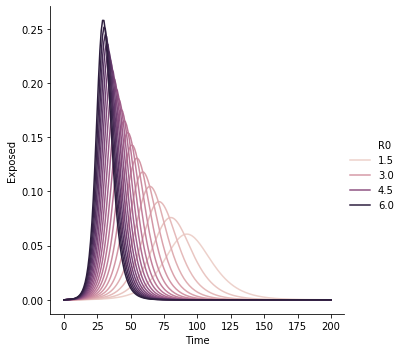

In [6]:
sns.relplot(x="Time", y="Exposed",
            hue="R0", kind="line", data=baseline);

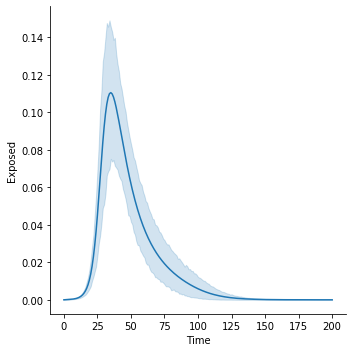

In [8]:
sns.relplot(x="Time", y="Exposed", kind="line", data=baseline);